![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Assignement Session 5 and 6

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2020-11-12)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/exercises/Session_5_6_EXERCISES.ipynb)

In [21]:
# Within IPython notebook, add multiple print capabilities
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## **Victor Please Read**

Firstly, just to point out I have done some extra work in this notebook then what was asked as I wanted to practice other material as well.

Secondly, Please read the questions I typed at the end of the notebook after you read it.

# EXERCISE 1: image filtering

From the datasets (images) available from [skimage data](https://scikit-image.org/docs/dev/api/skimage.data.html), choose an **RGB** image and do the following:

* Crop the image
* Smoothen the image with a kernel filter.
* Sharpen the image with a kernel filter
* Find the edges of the image with at least two different methods.
* From the processes above, save the image that you prefer as a .jpg

<Figure size 576x576 with 0 Axes>

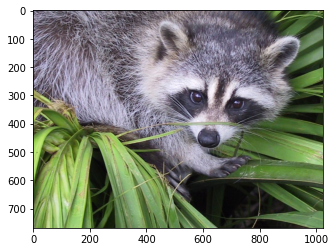

<Figure size 576x576 with 0 Axes>

In [2]:
import imageio
import matplotlib.pyplot as plt
from scipy import misc

f = misc.face()                             # Puts f equal to the racoon face
imageio.imwrite('face.jpg', f)              # Draws the image face.jpg
plt.imshow(f)
plt.figure(figsize=(8, 8))
plt.show()


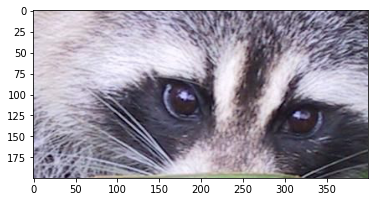

In [3]:
# Slicing the image

plt.imshow(f[200:400, 400:800])


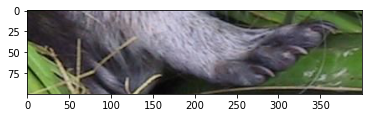

In [4]:
# Slicing the image

plt.imshow(f[500:600, 400:800])

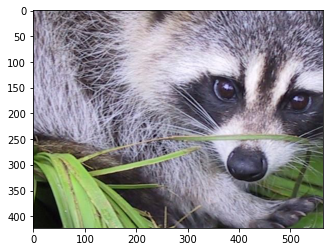

In [5]:
plt.imshow(f[153:576, 204:768])

<Figure size 576x576 with 0 Axes>

(0.0, 1.0, 0.0, 1.0)

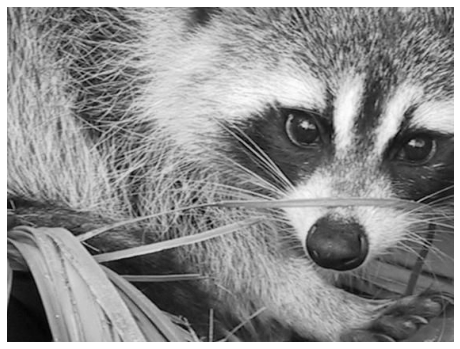

In [6]:
# Cropping the image

import numpy as np
import scipy.misc
from scipy import ndimage


face = scipy.misc.face(gray=True)

lx, ly = face.shape
crop_face = face[lx//5:-lx//4, ly//5:-ly//4 ]


plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(crop_face, cmap=plt.cm.gray)

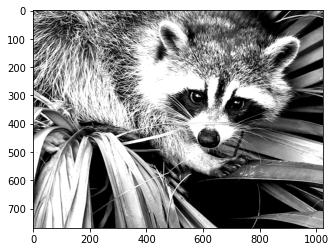

In [7]:
# Extra Practice

# Increase image contrast

face_contrast = np.clip(face, 50, 180)           # clips the histogram (range of values a pixel can occupy) to get a more contrast image

plt.imshow(face_contrast, cmap=plt.cm.gray)

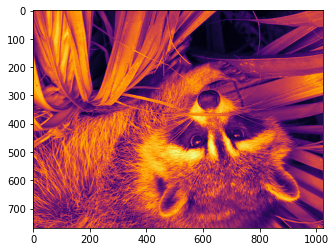

In [8]:
# Flip image

face_flip = np.flipud(face)
plt.imshow(face_flip, cmap=plt.cm.inferno)

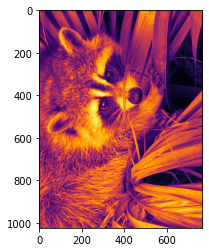

In [9]:
# Rotate Face

face_rotate = ndimage.rotate(face, 90)
plt.imshow(face_rotate, cmap=plt.cm.inferno)

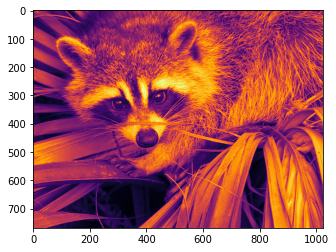

In [10]:
face_side_flip = np.fliplr(face)
plt.imshow(face_side_flip, cmap=plt.cm.inferno)


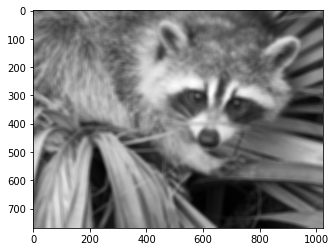

In [11]:
# Smoothen the image with a kernel filter.

# We can easily pass a uniform filter to blur the image as follows

local_mean = ndimage.uniform_filter(face, size=15)
plt.imshow(local_mean, cmap=plt.cm.gray)

Text(0.5, 1.0, 'Original')

Text(0.5, 1.0, 'Box Blur Convolsion')

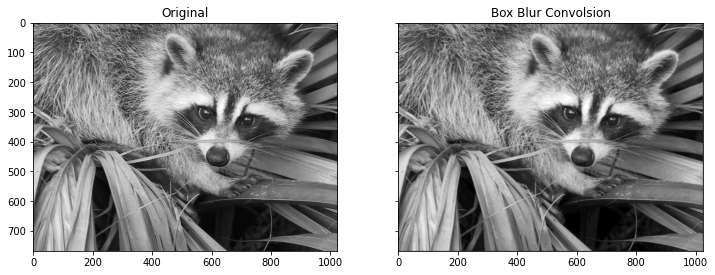

In [14]:


# We can also smoothen our image using a low pass filter which decreases the disparity between high and low pixel values

kernel = np.array([ [1/90,1/90,1/90], 
                    [1/90,1/90,1/90], 
                    [1/90,1/90,1/90]]) 

low_filter = ndimage.convolve(face, kernel, mode='constant', cval=0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(12, 12))

ax[0].imshow(face, cmap=plt.cm.gray)
ax[0].set_title("Original")

ax[1].imshow(low_filter, cmap=plt.cm.gray)
ax[1].set_title("Box Blur Convolsion")


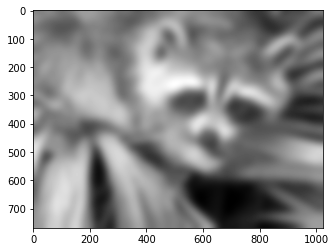

In [15]:
# We can easily pass a gaussian filter to blur the image as follows

local_mean = ndimage.gaussian_filter(face, sigma=15)
plt.imshow(local_mean, cmap=plt.cm.gray)

# Gaussian filter blurs the photo, the more standard deviations you have
# gets rid of extreme values

Text(0.5, 1.0, 'Original')

Text(0.5, 1.0, 'Gaussian Blur Convulsion')

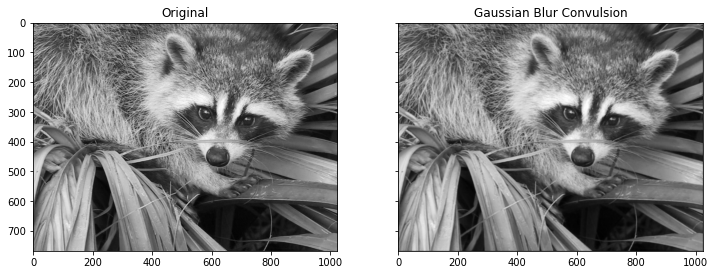

In [16]:
gaussian_kernel = 1/256*np.array([ [1, 4, 6, 4, 1], 
                        [4, 16, 24, 16, 4], 
                        [6, 24, 36, 24, 6],
                        [4, 16, 24, 16, 4],
                        [1, 4, 6, 4, 1]]) 

gaussian_filter = ndimage.convolve(face, gaussian_kernel, mode='constant', cval=0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(12, 12))

ax[0].imshow(face, cmap=plt.cm.gray)
ax[0].set_title("Original")

ax[1].imshow(gaussian_filter, cmap=plt.cm.gray)
ax[1].set_title("Gaussian Blur Convulsion")

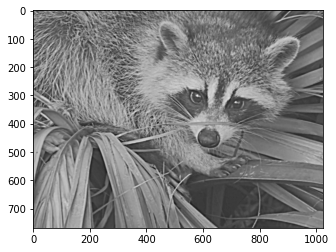

In [17]:
# Sharpen the image with a kernel filter

# Firstly, we can sharpen a blurred image by subtracting a blurred image from a blurred image to get the differece and then adding 
# this difference to the blurred image 


face = scipy.misc.face(gray=True).astype(float)

face_blurred = ndimage.gaussian_filter(face, sigma=3)
face_double_blurred = ndimage.gaussian_filter(face_blurred, sigma=1)

alpha = 30

sharpened = face + alpha*(face_blurred - face_double_blurred)

plt.imshow(sharpened, cmap=plt.cm.gray)

Text(0.5, 1.0, 'Original')

Text(0.5, 1.0, 'High Pass Filter Convulsion')

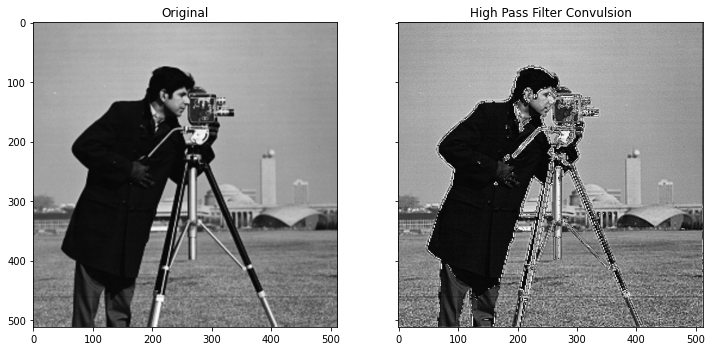

In [22]:
# We can also sharpen the image by passing a high pass filter 

# A high pass filter tends to retain the high frequency information within an image while reducing the low frequency information.

from skimage.data import camera
image = camera()


sharpening_kernel = np.array([ [0, -1, 0], 
                             [-1, 5, -1], 
                             [0, -1, 0]])

sharpening_filter = ndimage.convolve(image, sharpening_kernel, mode='constant', cval=0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(12, 12))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Original")

ax[1].imshow(sharpening_filter, cmap=plt.cm.gray)
ax[1].set_title("High Pass Filter Convulsion")

Text(0.5, 1.0, 'Original')

Text(0.5, 1.0, 'Sobel Filter')

Text(0.5, 1.0, 'Roberts Filter')

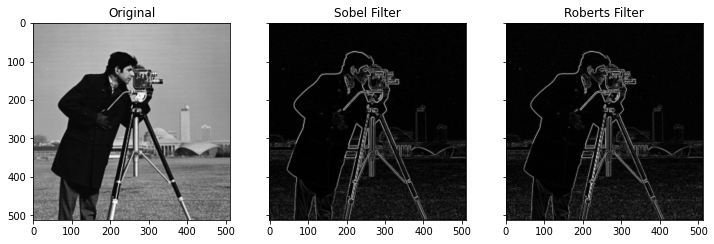

In [19]:
# Find the edges of the image with at least two different methods.

# Edge Detection: First Method - Using Sobel & Roberts methods of edge detection

from skimage.data import camera
from skimage.filters import roberts, sobel

image = camera()

edge_sobel = sobel(image)
edge_roberts = roberts(image)


fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(12, 12))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Original")

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title("Sobel Filter")

ax[2].imshow(edge_roberts, cmap=plt.cm.gray)
ax[2].set_title("Roberts Filter")



Text(0.5, 1.0, 'Original')

Text(0.5, 1.0, 'High Pass Filter Convulsion')

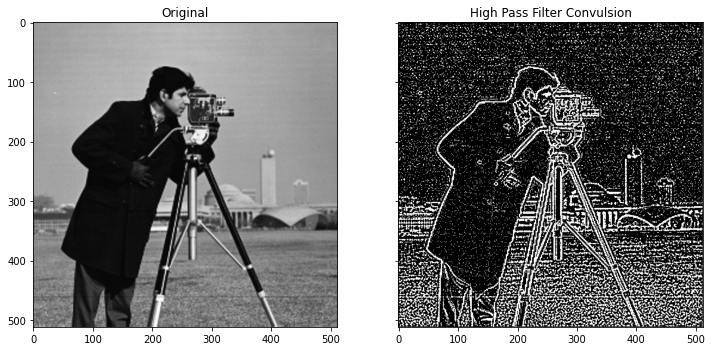

In [20]:
# Edge Detection: Second Method - High frequency extraction of edges - High Pass Filter


from skimage.data import camera
image = camera()


sharpening_kernel = np.array([ [-1, -1, -1], 
                               [-1, 8, -1], 
                               [-1, -1, -1]]) / 9

sharpening_filter = ndimage.convolve(image, sharpening_kernel, mode='constant', cval=0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(12, 12))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Original")

ax[1].imshow(sharpening_filter, cmap=plt.cm.gray)
ax[1].set_title("High Pass Filter Convulsion")


In [26]:
# Save preferred image as a jpg

from PIL import Image
im = Image.fromarray(edge_roberts)
im.save("edge_roberts.jpg")                        


OSError: ignored

# EXERCISE 2: semi-super resolution!

Take one image on your own (or one blurred image from somewhere) and apply the techniques we have seen in class to sharpen an image from a blurred one. You can also blur one image of your own as a start.

<Figure size 864x432 with 0 Axes>

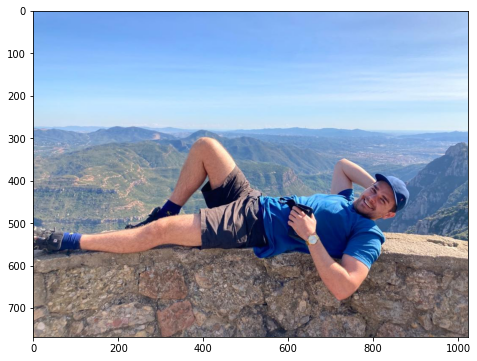

In [38]:
import imageio
import matplotlib.pyplot as plt


#montserrat = imageio.imread('/Users/lukeclarke/Documents/github_repos/bts-dsf-2020/Session_5/montserrat.jpg')
montserrat = imageio.imread('montserrat.jpg')

plt.figure(figsize = (12,6))
plt.imshow(montserrat)
plt.show()

<Figure size 864x432 with 0 Axes>

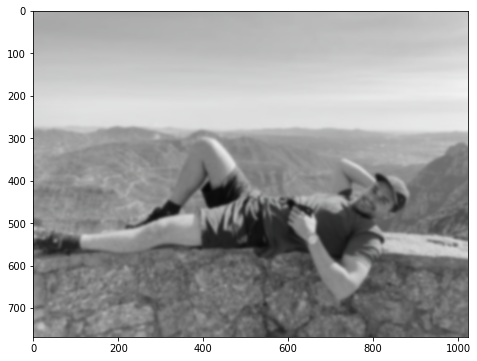

In [39]:
# Blurring the previous image

blurred_luke = ndimage.gaussian_filter(montserrat, 3)
plt.figure(figsize = (12,6))
plt.imshow(blurred_luke)

<Figure size 864x432 with 0 Axes>

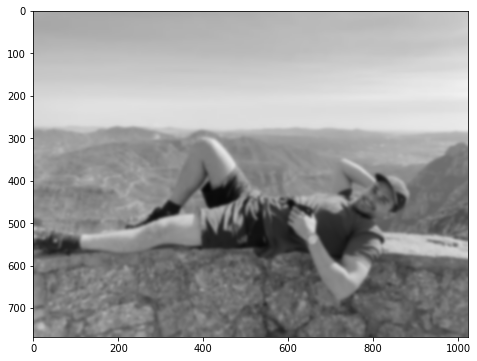

In [40]:
# Creating a blur of a blurred image

super_blurred_luke = ndimage.gaussian_filter(blurred_luke, 1)
plt.figure(figsize = (12,6))
plt.imshow(super_blurred_luke)

<Figure size 864x432 with 0 Axes>

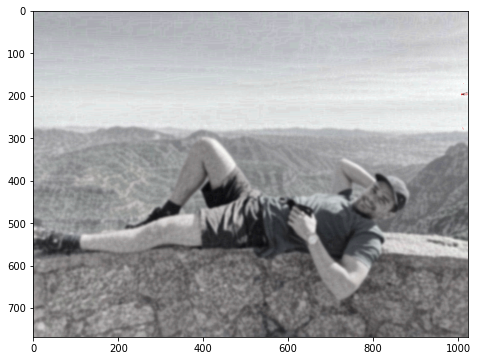

In [41]:
# Retaining some sharpness of the previously blurred image

alpha = 7
sharpened_luke = blurred_luke + alpha*(blurred_luke - super_blurred_luke)
plt.figure(figsize = (12,6))
plt.imshow(sharpened_luke)

In [4]:
from skimage.color import rgb2gray

plt.figure(figsize = (12,6))
gray_luke = rgb2gray(montserrat)
plt.imshow(gray_luke)

blurred_luke = ndimage.gaussian_filter(gray_luke, 3)

plt.title("Inferno Luke")
plt.imshow(blurred_luke, cmap=plt.cm.inferno)

NameError: ignored

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Blurred Luke')

Text(0.5, 1.0, 'High Pass Filter Convolsionised Luke')

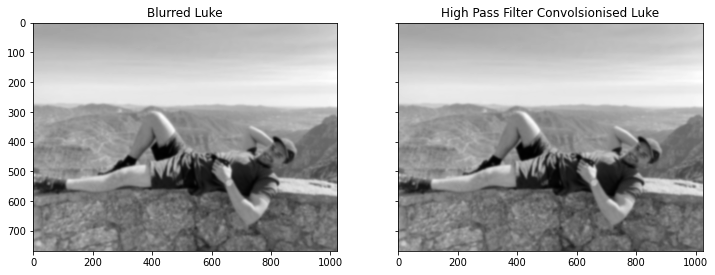

In [33]:
# We can also sharpen the image by passing a high pass filter as we did in exercise one

# A high pass filter tends to retain the high frequency information within an image while reducing the low frequency information.


sharpening_kernel = np.array([ [0, -1, 0], 
                             [-1, 50000, -1], 
                             [0, -1, 0]])

sharpening_filter = ndimage.convolve(blurred_luke, sharpening_kernel, mode='constant', cval=0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(12, 12))

ax[0].imshow(blurred_luke, cmap=plt.cm.gray)
ax[0].set_title("Blurred Luke")

ax[1].imshow(sharpening_filter, cmap=plt.cm.gray)
ax[1].set_title("High Pass Filter Convolsionised Luke")

# EXERCISE 3: image segmentation
Take a picture with your phone or your camera of some objects that you want to count. (Beware: try to take high contrast images with a stable background, preferably dark over white or similar such as coins, chessboard, etc.).

Load the image with scikit image
Count the objects in the image using region based segmentation
Try to fix the image using opening/closing algorithms

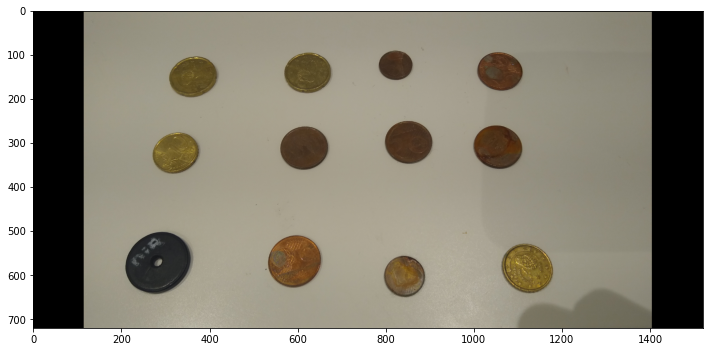

In [2]:
import imageio
import matplotlib.pyplot as plt


#coins = imageio.imread('/Users/lukeclarke/Documents/github_repos/bts-dsf-2020/Session_5/coins_image.jpeg')
coins = imageio.imread('coins_image.png')

plt.figure(figsize = (12,6))
plt.imshow(coins, cmap=plt.cm.gray)
plt.show()

<Figure size 576x576 with 0 Axes>

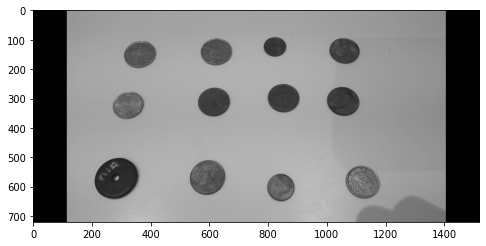

In [75]:
from skimage.color import rgb2gray

gray_coins = rgb2gray(coins)
plt.figure(figsize=(8, 8))
plt.imshow(gray_coins, cmap=plt.cm.gray)

In [79]:
gray_coins = gray_coins[:, 120:1400]

In [6]:
gray_coins[:, 200:350]

array([[0.56350039, 0.56742196, 0.56742196, ..., 0.58310824, 0.58310824,
        0.58310824],
       [0.56350039, 0.56183373, 0.57134353, ..., 0.58310824, 0.5752651 ,
        0.58113608],
       [0.56350039, 0.55957882, 0.55957882, ..., 0.58619647, 0.58310824,
        0.58310824],
       ...,
       [0.59769333, 0.59655451, 0.60328157, ..., 0.66464275, 0.66492549,
        0.66492549],
       [0.59880941, 0.59346627, 0.60019333, ..., 0.68396784, 0.68453333,
        0.66884706],
       [0.59488784, 0.59346627, 0.59655451, ..., 0.69181098, 0.70414118,
        0.69993686]])

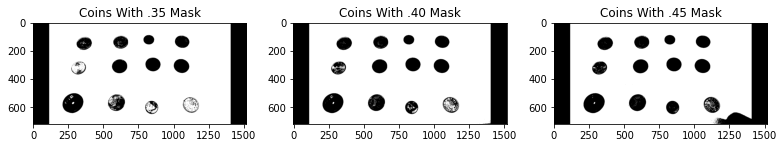

In [7]:
# The Naive Approach To Segmentation

coins_35 = gray_coins > .35

coins_40 = gray_coins > .4

coins_45 = gray_coins > .45

fig, ax = plt.subplots(ncols=3, sharex=False, sharey=False, figsize=(11, 4))

ax[0].imshow(coins_35, cmap=plt.cm.gray )
ax[0].set_title('Coins With .35 Mask')

ax[1].imshow(coins_40, cmap=plt.cm.gray )
ax[1].set_title('Coins With .40 Mask')

ax[2].imshow(coins_45, cmap=plt.cm.gray )
ax[2].set_title('Coins With .45 Mask')


plt.tight_layout()
plt.show()



In [ ]:
"""Simply thresholding the image leads either to missing significant parts of the coins,
   or to merging parts of the background with the coins. This is due to the inhomogeneous
   lighting of the image.

   Not as prevalent here as in the in class example as the photo I took was of dark coins on a 
   very bright white canvas"""

Text(0.5, 1.0, 'Canny Coins')

Text(0.5, 1.0, 'Sobel Coins')

<function matplotlib.pyplot.tight_layout>

<function matplotlib.pyplot.show>

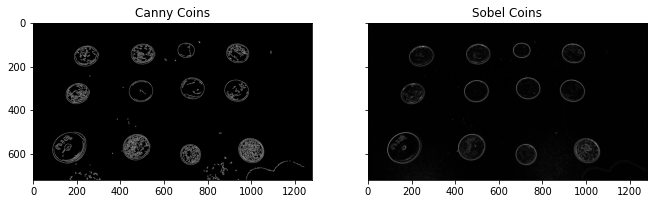

In [119]:
from skimage.filters import sobel 
from skimage.feature import canny


canny_coins = canny(gray_coins/.5)

sobel_coins = sobel(gray_coins)


fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(11, 4))

ax[0].imshow(canny_coins, cmap=plt.cm.gray)
ax[0].set_title("Canny Coins")

ax[1].imshow(sobel_coins, cmap=plt.cm.gray)
ax[1].set_title("Sobel Coins")

plt.tight_layout
plt.show

Text(0.5, 1.0, 'Canny Coins')

Text(0.5, 1.0, 'Sobel Coins')

<function matplotlib.pyplot.tight_layout>

<function matplotlib.pyplot.show>

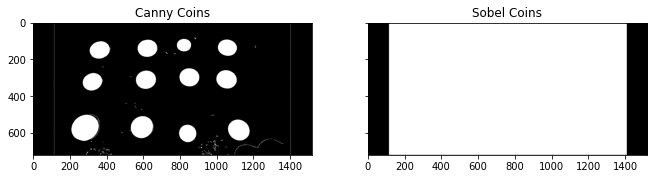

In [24]:
from skimage.io import imshow
from scipy import ndimage as ndi


fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(11, 4))


fill_canny_coins = ndi.binary_fill_holes(canny_coins)

fill_sobel_coins = ndi.binary_fill_holes(sobel_coins)



ax[0].imshow(fill_canny_coins, cmap=plt.cm.gray)
ax[0].set_title("Canny Coins")

ax[1].imshow(fill_sobel_coins, cmap=plt.cm.gray)
ax[1].set_title("Sobel Coins")

plt.tight_layout
plt.show

## Why is the entire image filling for the sobel coins detector?

509


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


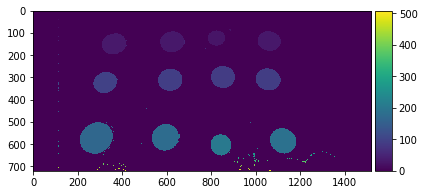

In [25]:
# In the canny detector our coins have been segmented from the background, however there is still noise in the background ( small objects )
# we can use ndi.label to label objects smaller then a threshold

label_objects, nb_labels = ndi.label(fill_canny_coins)            # label_objects = labels in image, nb_labels = number of labels

print(nb_labels)
imshow(label_objects)

In [27]:
""" We can see above there are 509 objects being counted, however we only 12 coins in the image,
    so we must remove all of the small object noise in the image"""

' We can see above there are 509 objects being counted, however we only 12 coins in the image,\n    so we must remove all of the small object noise in the image'

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


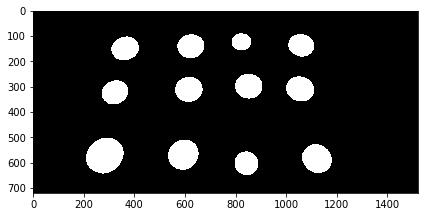

In [34]:
import numpy as np

# we get the sizes of each object

sizes = np.bincount(label_objects.ravel())


mask_sizes = sizes > 50
mask_sizes[0] = 0

coins_cleaned = mask_sizes[label_objects]   
# masksizes comes from sizes which is a numpy array of sizes of label objects, so same order,
# we are therefor only considering the TRUE sizes ( > 50 )

imshow(coins_cleaned)
print(coins_cleaned)

In [ ]:
"""Canny edge detector worked nicely above, but sometimes it doesn't close the shapes fully & thus the filling function doesn't 
   work properly
   
   Lets try region based Segmentation instead"""

<Figure size 432x432 with 0 Axes>

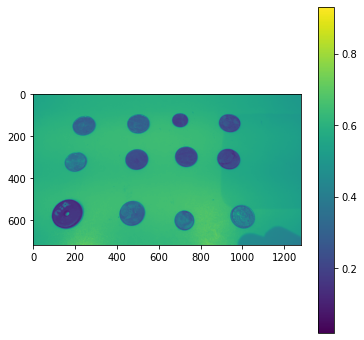

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.imshow(gray_coins)
plt.colorbar()
plt.show()

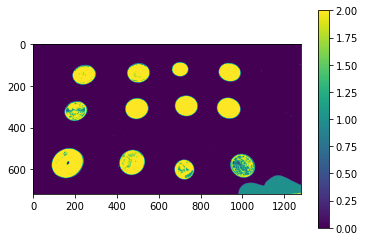

In [170]:
# Let us first determine markers of the coins and the background. These markers are pixels that we can label unambiguously
# as either object or background. Here, the markers are found at the two extreme parts of the histogram of grey values

# Creates a numpy array of zeroes like the coins image (Fully white image)
markers = np.zeros_like(gray_coins)

# Pixel values above point 2 in coins are equal to 1, therefor black

markers[gray_coins < .40] = 2    
markers[gray_coins > .40] = 1  
markers[gray_coins > .5] = 0


plt.imshow(markers)
plt.colorbar()



/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


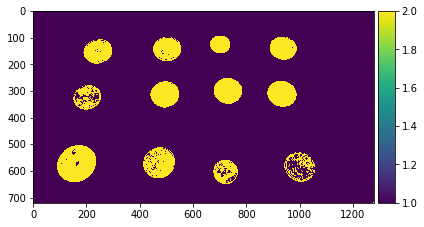

In [165]:
from skimage.morphology import watershed

segmentation = watershed(sobel_coins, markers)
imshow(segmentation)

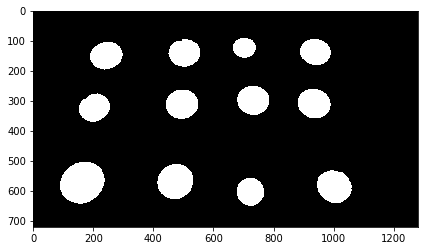

In [166]:
from skimage.io import imshow

segmentation_threshold = ndi.binary_fill_holes(segmentation - 1)

segmentation_2 = ndi.binary_opening(segmentation_threshold)

imshow(segmentation_2)



13


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


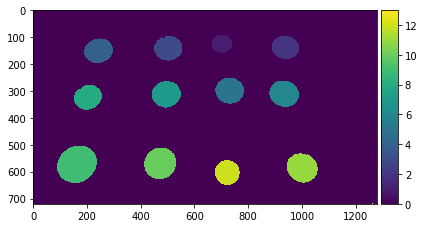

In [167]:
labeled_coins, count_coins = ndi.label(segmentation_2)

print(count_coins)
imshow(labeled_coins)

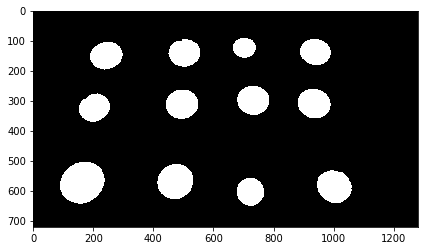

In [168]:
sizes = np.bincount(labeled_coins.ravel())


mask_sizes = sizes > 100
mask_sizes[0] = 0


real_coins = mask_sizes[labeled_coins]   
imshow(real_coins)

12


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


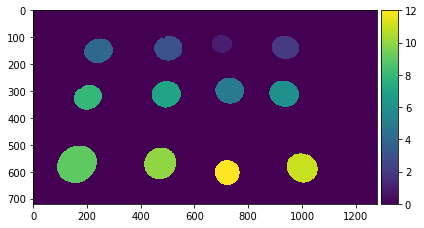

In [169]:
labeled_real_coins, count_real_coins = ndi.label(real_coins)

print(count_real_coins)
imshow(labeled_real_coins)

# **Victor!** 

After doing this assignment I have some important questions that I would appreciate some feedback on.

   1. Why is the line: 
   fill_sobel_coins = ndi.binary_fill_holes(sobel_coins)

   is the fill not working properly and filling the entire image instead?

   2. In the bincount function, why is it necessary to put the first item in the array = 0?

   3. My watershed algorithm wasn't working the way I would have liked:
   
   - Why are all the numbers in the numpy arrays of my image decimals?
   - The masks for the watershed algorithm were really confusing me, it turned out my background had a higher pixel value then the coins? even though the image is suppose to be a numpy array of zeroes except for the markers? It makes no sense?

   -I had put in three masks and play around with pixel values to try and force it to work.
